c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\torch\hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Robel/.cache\torch\hub\master.zip


Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\Robel\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5  2025-2-3 Python-3.11.9 torch-2.6.0+cpu CPU

100%|██████████| 14.1M/14.1M [01:53<00:00, 130kB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
C:\Users\Robel/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
WARNING  NMS time limit 0.550s exceeded


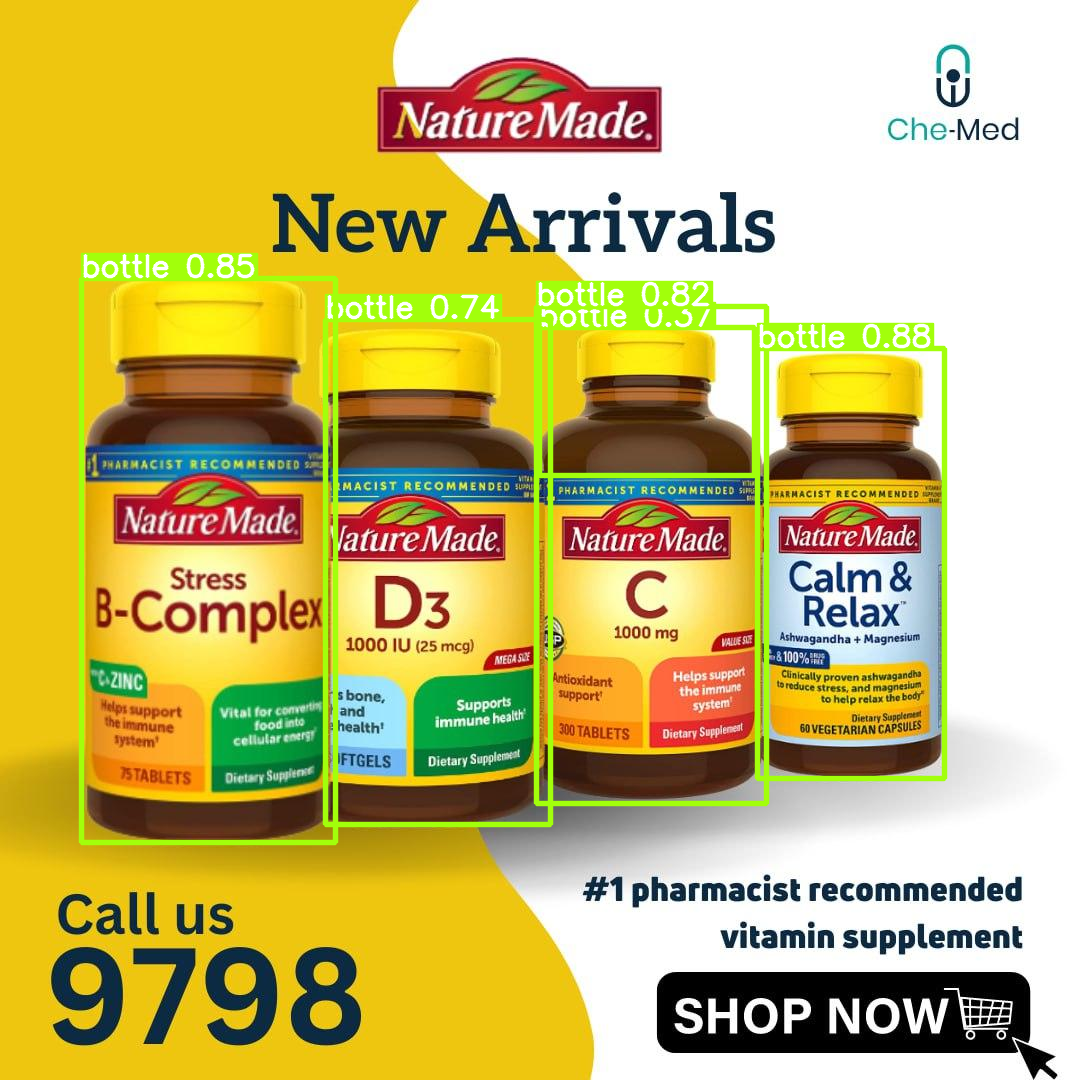

         xmin        ymin        xmax        ymax  confidence  class    name
0  757.811279  348.047424  944.060852  778.177307    0.875281     39  bottle
1   81.840752  278.571381  335.855133  842.910583    0.850323     39  bottle
2  536.906494  306.813507  766.176697  803.845337    0.820090     39  bottle
3  325.853668  319.156555  550.056763  824.228394    0.742377     39  bottle
4  539.046753  327.087219  754.066650  475.226074    0.371470     39  bottle


In [1]:
import torch
from PIL import Image
import matplotlib.pyplot as plt

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # 'yolov5s' is the small version, for higher accuracy use 'yolov5m', 'yolov5l', or 'yolov5x'

# Function to perform object detection
def detect_objects(image_path):
    img = Image.open(image_path)
    results = model(img)
    results.show()  # Display the results

    # Extract detection results
    return results.pandas().xyxy[0]  # Bounding box coordinates, confidence scores, and class labels

# Load an image and run detection
image_path = 'D:/KAIM/WEEK 7/KAIM WEEK7/notebooks/telegram_images/CheMed123_77.jpg'
detection_results = detect_objects(image_path)
print(detection_results)


In [4]:
import torch
from PIL import Image

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Function to perform object detection and extract results
def detect_objects(image_path):
    img = Image.open(image_path)
    results = model(img)

    # Extract bounding box coordinates, confidence scores, and class labels
    detection_results = results.pandas().xyxy[0]
    return detection_results

# Example: Process multiple images
image_paths = ['D:/KAIM/WEEK 7/KAIM WEEK7/notebooks/telegram_images/CheMed123_78.jpg', 'D:/KAIM/WEEK 7/KAIM WEEK7/notebooks/telegram_images/CheMed123_80.jpg']
all_results = []
for path in image_paths:
    results = detect_objects(path)
    all_results.append(results)

# Print the results for each image
for idx, result in enumerate(all_results):
    print(f"Results for image {idx + 1}:\n", result)


Using cache found in C:\Users\Robel/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-2-3 Python-3.11.9 torch-2.6.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
C:\Users\Robel/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Robel/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Results for image 1:
          xmin        ymin        xmax         ymax  confidence  class    name
0  437.534485  754.182617  888.737854  1127.468994    0.544800      0  person
1    0.000000  672.382202  528.717407  1266.235840    0.451538      0  person
2  121.921539  618.880676  683.602173   831.620667    0.308655     46  banana
Results for image 2:
          xmin        ymin        xmax         ymax  confidence  class    name
0   58.191910  160.353027  541.728760  1009.606384    0.933747      0  person
1  682.600220  477.188477  718.447083   599.653503    0.576012     56   chair
2   15.417995   27.744150  143.576706   303.092377    0.367081     39  bottle


In [6]:
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

# Load environment variables from a .env file
load_dotenv()

# Access the environment variables
db_name = os.getenv('DB_NAME')
db_user = os.getenv('DB_USER')
db_password = os.getenv('DB_PASSWORD')
db_host = os.getenv('DB_HOST')
db_port = os.getenv('DB_PORT')

# Create the database connection string
db_url = f"postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"

# Create the SQLAlchemy engine
engine = create_engine(db_url)

# Example detection results DataFrame for Image 1
data_image1 = {
    'xmin': [437.534485, 0.000000, 121.921539],
    'ymin': [754.182617, 672.382202, 618.880676],
    'xmax': [888.737854, 528.717407, 683.602173],
    'ymax': [1127.468994, 1266.235840, 831.620667],
    'confidence': [0.544800, 0.451538, 0.308655],
    'class': [0, 0, 46],
    'name': ['person', 'person', 'banana']
}

data_image2 = {
    'xmin': [58.191910, 682.600220, 15.417995],
    'ymin': [160.353027, 477.188477, 27.744150],
    'xmax': [541.728760, 718.447083, 143.576706],
    'ymax': [1009.606384, 599.653503, 303.092377],
    'confidence': [0.933747, 0.576012, 0.367081],
    'class': [0, 56, 39],
    'name': ['person', 'chair', 'bottle']
}

detection_results_image1 = pd.DataFrame(data_image1)
detection_results_image2 = pd.DataFrame(data_image2)

# Combine both DataFrames
detection_results = pd.concat([detection_results_image1, detection_results_image2], ignore_index=True)

# Rename the conflicting columns
detection_results.rename(columns={
    'xmin': 'x_min',
    'ymin': 'y_min',
    'xmax': 'x_max',
    'ymax': 'y_max'
}, inplace=True)

# Store detection results in a table
detection_results.to_sql('detection_data', con=engine, if_exists='replace', index=False)

print("Detection data has been successfully stored in PostgreSQL!")


Detection data has been successfully stored in PostgreSQL!


In [7]:
import logging

logging.basicConfig(filename='detection.log', level=logging.INFO, 
                    format='%(asctime)s:%(levelname)s:%(message)s')

logging.info('Started object detection process')